In [144]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [145]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [146]:
NUM_CLASSES = 4

# Dataset reading

In [147]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [148]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [150]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [151]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_14 (Dropout)        (None, 42)                0         
                                                                 
 dense_21 (Dense)            (None, 20)                860       
                                                                 
 dropout_15 (Dropout)        (None, 20)                0         
                                                                 
 dense_22 (Dense)            (None, 10)                210       
                                                                 
 dense_23 (Dense)            (None, 4)                 44        
                                                                 
Total params: 1114 (4.35 KB)
Trainable params: 1114 (4.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [152]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [153]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [154]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 [>.............................] - ETA: 12s - loss: 1.4571 - accuracy: 0.2266
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 1s 6ms/step - loss: 1.3686 - accuracy: 0.2935 - val_loss: 1.2687 - val_accuracy: 0.4045
Epoch 2/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.3479 - accuracy: 0.3516
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.2771 - accuracy: 0.3753 - val_loss: 1.1987 - val_accuracy: 0.5163
Epoch 3/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.2790 - accuracy: 0.3281
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.2309 - accuracy: 0.4143 - val_loss: 1.1421 - val_accuracy: 0.5363
Epoch 4/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.1587 - accuracy: 0.5078

C:\Users\91823\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.1807 - accuracy: 0.4471 - val_loss: 1.0841 - val_accuracy: 0.5813
Epoch 5/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.1324 - accuracy: 0.4922
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.1374 - accuracy: 0.4850 - val_loss: 1.0320 - val_accuracy: 0.6080
Epoch 6/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.1109 - accuracy: 0.4766
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.1038 - accuracy: 0.4933 - val_loss: 0.9727 - val_accuracy: 0.6514
Epoch 7/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.0819 - accuracy: 0.5469
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [=============

29/29 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.6950 - val_loss: 0.4595 - val_accuracy: 0.8424
Epoch 32/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7015 - accuracy: 0.6953
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.7034 - val_loss: 0.4573 - val_accuracy: 0.8424
Epoch 33/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6476 - accuracy: 0.7188
Epoch 33: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.7163 - accuracy: 0.6934 - val_loss: 0.4483 - val_accuracy: 0.8449
Epoch 34/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.7203 - accuracy: 0.7344
Epoch 34: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.7065 - accuracy: 0.7042 - va

Epoch 59/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6124 - accuracy: 0.7500
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.7507 - val_loss: 0.3468 - val_accuracy: 0.8974
Epoch 60/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6313 - accuracy: 0.7734
Epoch 60: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.7346 - val_loss: 0.3518 - val_accuracy: 0.8874
Epoch 61/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5702 - accuracy: 0.7031
Epoch 61: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.7479 - val_loss: 0.3500 - val_accuracy: 0.8882
Epoch 62/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6452 - accuracy: 0

 1/29 [>.............................] - ETA: 0s - loss: 0.5226 - accuracy: 0.7734
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.7643 - val_loss: 0.3100 - val_accuracy: 0.9074
Epoch 87/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6718 - accuracy: 0.7188
Epoch 87: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7596 - val_loss: 0.3057 - val_accuracy: 0.9149
Epoch 88/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6700 - accuracy: 0.7031
Epoch 88: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7810 - val_loss: 0.3005 - val_accuracy: 0.9149
Epoch 89/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5220 - accuracy: 0.8047
Epoch 89

Epoch 113/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.6046 - accuracy: 0.7422
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7596 - val_loss: 0.2781 - val_accuracy: 0.9399
Epoch 114/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4157 - accuracy: 0.8281
Epoch 114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.7699 - val_loss: 0.2783 - val_accuracy: 0.9333
Epoch 115/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5339 - accuracy: 0.8047
Epoch 115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5428 - accuracy: 0.7869 - val_loss: 0.2818 - val_accuracy: 0.9208
Epoch 116/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5636 - accu

Epoch 140/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4684 - accuracy: 0.8516
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7819 - val_loss: 0.2779 - val_accuracy: 0.9291
Epoch 141/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5128 - accuracy: 0.8203
Epoch 141: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7841 - val_loss: 0.2712 - val_accuracy: 0.9291
Epoch 142/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.5573 - accuracy: 0.7266
Epoch 142: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7727 - val_loss: 0.2762 - val_accuracy: 0.9233
Epoch 143/1000
 1/29 [>.............................] - ETA: 0s - loss: 0.4756 - accu

In [155]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.9341


In [156]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [157]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 40ms/step
[0.92636794 0.0542957  0.01499109 0.00434527]
0


# Confusion matrix

38/38 [==============================] - 0s 687us/step


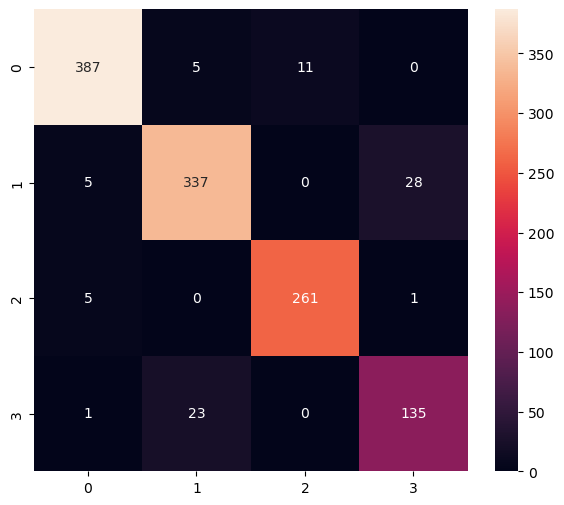

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       403
           1       0.92      0.91      0.92       370
           2       0.96      0.98      0.97       267
           3       0.82      0.85      0.84       159

    accuracy                           0.93      1199
   macro avg       0.92      0.92      0.92      1199
weighted avg       0.93      0.93      0.93      1199



In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [159]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\91823\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [160]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\91823\AppData\Local\Temp\tmpzxgcbxgb\assets


INFO:tensorflow:Assets written to: C:\Users\91823\AppData\Local\Temp\tmpzxgcbxgb\assets


6608

# Inference test

In [161]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [162]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [163]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [164]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [165]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.92636794 0.05429572 0.0149911  0.00434528]
0
